**Desafio: Deixar o gráfico mais bonito e a mensagem mais clara.**

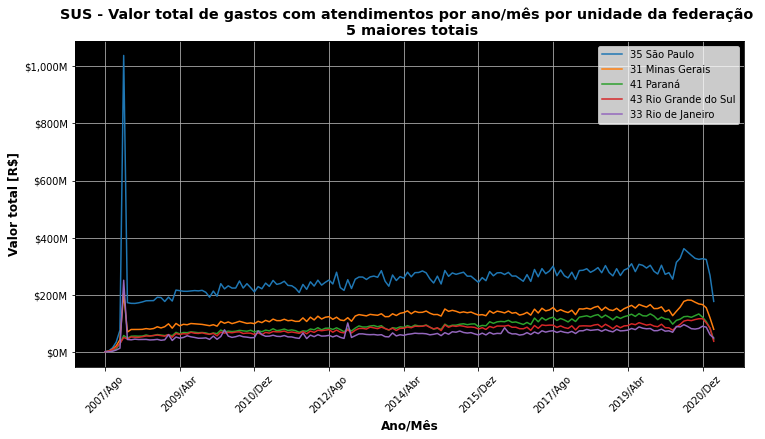

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dados = pd.read_csv("/content/A213524189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")

ordenado_por_total = usaveis.sort_values("Total",ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)

ax = ordenado_por_total.head().T.plot(figsize=(12,6))

#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}M"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))
ax.set_facecolor('black')

plt.legend(loc="upper right")
plt.title('SUS - Valor total de gastos com atendimentos por ano/mês por unidade da federação \n 5 maiores totais', weight='bold', fontsize='x-large' )
plt.xlabel("Ano/Mês",weight='bold',fontsize='large')
plt.ylabel("Valor total [R$]",weight='bold',fontsize='large')
plt.xticks(rotation=45)
plt.grid()
plt.show()